313/313 [==============================] - 2s 5ms/step


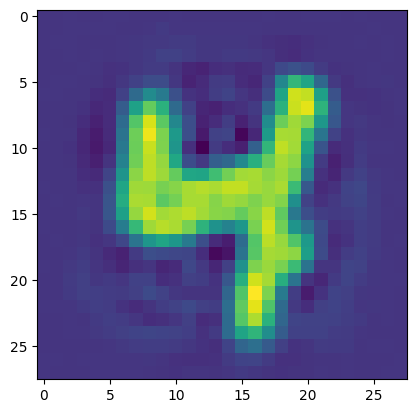

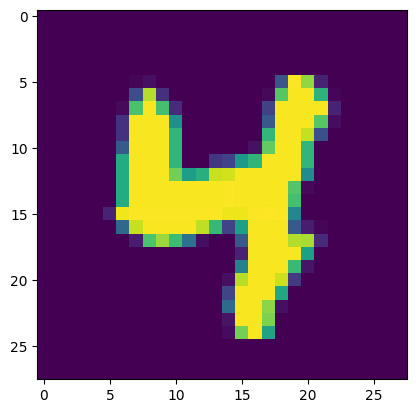

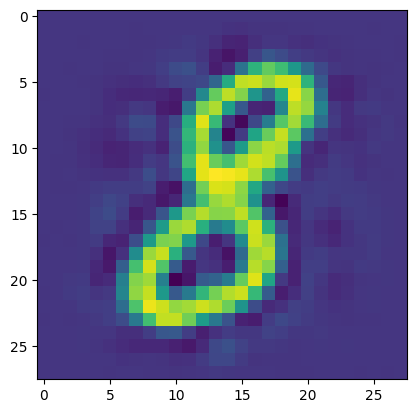

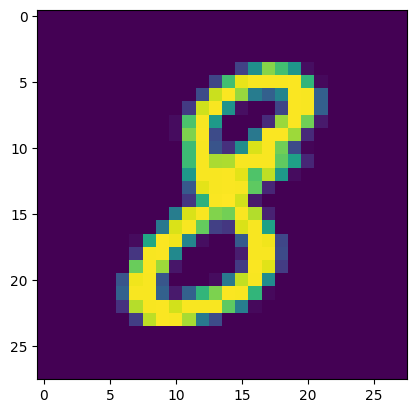

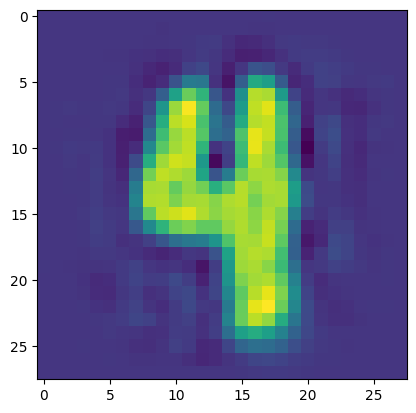

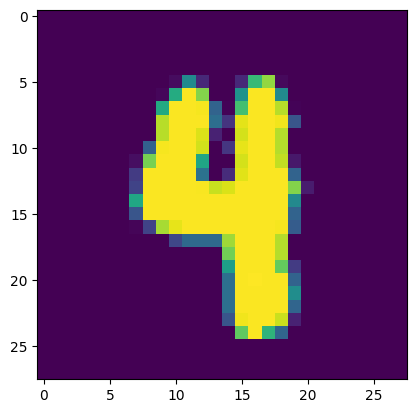

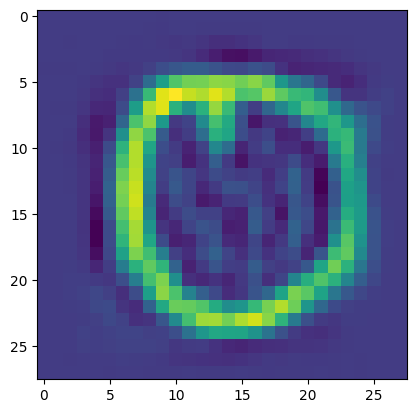

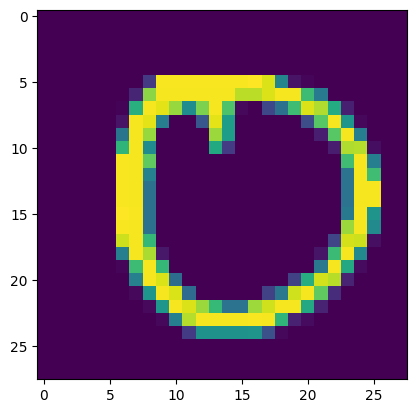

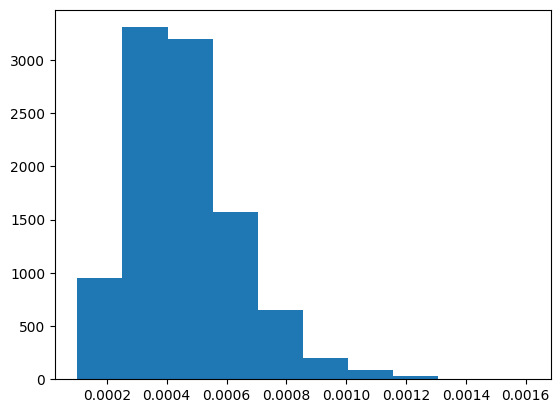

0.0


In [4]:
from keras.datasets import mnist
(_, _) , (test_images, _) = mnist.load_data()
test_images = test_images.reshape(test_images.shape[0] , -1)
test_images = test_images.astype('float32') / 255.0




import tensorflow as tf
autoencoder = tf.keras.models.load_model('mnist_AE.h5')
reconstructed_images = autoencoder.predict(test_images)


import numpy as np
import matplotlib.pyplot as plt
a1 = np.reshape(test_images[85], (28,28))
b1 = np.reshape(test_images[110], (28,28))
c1 = np.reshape(test_images[250], (28,28))
d1 = np.reshape(test_images[305], (28,28))

a = np.reshape(reconstructed_images[85], (28,28))
b = np.reshape(reconstructed_images[110], (28,28))
c = np.reshape(reconstructed_images[250], (28,28))
d = np.reshape(reconstructed_images[305], (28,28))
plt.imshow(a)
plt.show()
plt.imshow(a1)
plt.show()
plt.imshow(b)
plt.show()
plt.imshow(b1)
plt.show()
plt.imshow(c)
plt.show()
plt.imshow(c1)
plt.show()
plt.imshow(d)
plt.show()
plt.imshow(d1)
plt.show()


def MSE_func(images, reconstructed):
    res = []
    i = 0
    while (i < len(images)):
        t = 0
        for j in range(len(images[i])):
            t += ((images[i][j] - reconstructed[i][j]) ** 2)
        t = t / len(images)
        res.append(t)
        i += 1
    return res

MSE = MSE_func(test_images, reconstructed_images)
plt.hist(MSE)
plt.show()



def mean_sd_func(MSE):
  mean = 0
  sd = 0
  t = 0

  for i in range(len(MSE)):
    t += MSE[i]
  mean = t / len(MSE)

  t = 0
  for i in range(len(MSE)):
    t += ((mean - MSE[i]) ** 2)

  sd = t ** 0.5
  return (mean, sd)

moments = mean_sd_func(MSE)
from scipy import stats
ks_statistic, p_value = stats.kstest(MSE, cdf='norm', args=moments)
print(p_value)